In [265]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from alpha_vantage.timeseries import TimeSeries

In [266]:
#load the data from AlphaVantage
key = '3KCUP943508G9N7E'
ts = TimeSeries(key, output_format='pandas')
data, meta = ts.get_intraday('SPY', interval='30min', outputsize='full')

columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns
data['Date'] = data.index.date

In [267]:
#Look at the data
print(data.head())
print(meta)

                      open    high     low     close    volume        Date
date                                                                      
2023-02-08 20:00:00  411.3  411.43  411.25  411.4087   55924.0  2023-02-08
2023-02-08 19:30:00  411.2  411.43  411.18  411.3100   20045.0  2023-02-08
2023-02-08 19:00:00  410.9  411.27  410.90  411.1600   36338.0  2023-02-08
2023-02-08 18:30:00  410.9  410.98  410.57  410.9000  149761.0  2023-02-08
2023-02-08 18:00:00  411.0  411.00  410.85  410.9000   40852.0  2023-02-08
{'1. Information': 'Intraday (30min) open, high, low, close prices and volume', '2. Symbol': 'SPY', '3. Last Refreshed': '2023-02-08 20:00:00', '4. Interval': '30min', '5. Output Size': 'Full size', '6. Time Zone': 'US/Eastern'}


(896,)

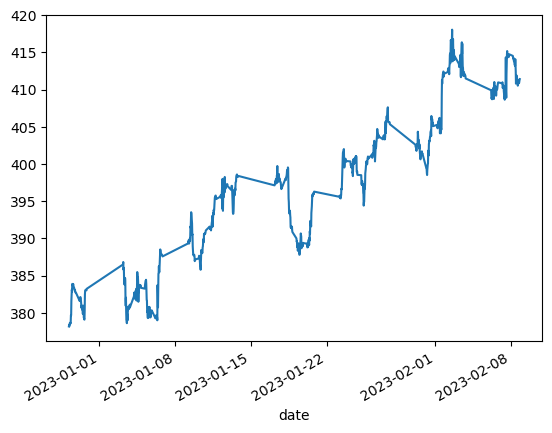

In [268]:
data['close'].plot()
data['close'].shape

In [269]:
y = np.array(data['close'])
y.shape

(896,)

In [270]:
data = data.reset_index()
x = np.array(data.index).reshape(-1,1)
y = np.array(data['close'])
data.head()

,date,open,high,low,close,volume,Date
0,2023-02-08 20:00:00,411.3,411.43,411.25,411.4087,55924.0,2023-02-08
1,2023-02-08 19:30:00,411.2,411.43,411.18,411.3100,20045.0,2023-02-08
2,2023-02-08 19:00:00,410.9,411.27,410.90,411.1600,36338.0,2023-02-08
3,2023-02-08 18:30:00,410.9,410.98,410.57,410.9000,149761.0,2023-02-08
4,2023-02-08 18:00:00,411.0,411.00,410.85,410.9000,40852.0,2023-02-08


In [271]:
#Perform the linear regression model uscing Scikit Learn
reg = LinearRegression().fit(x,y)
reg.score(x,y)
predictions = reg.predict(x)


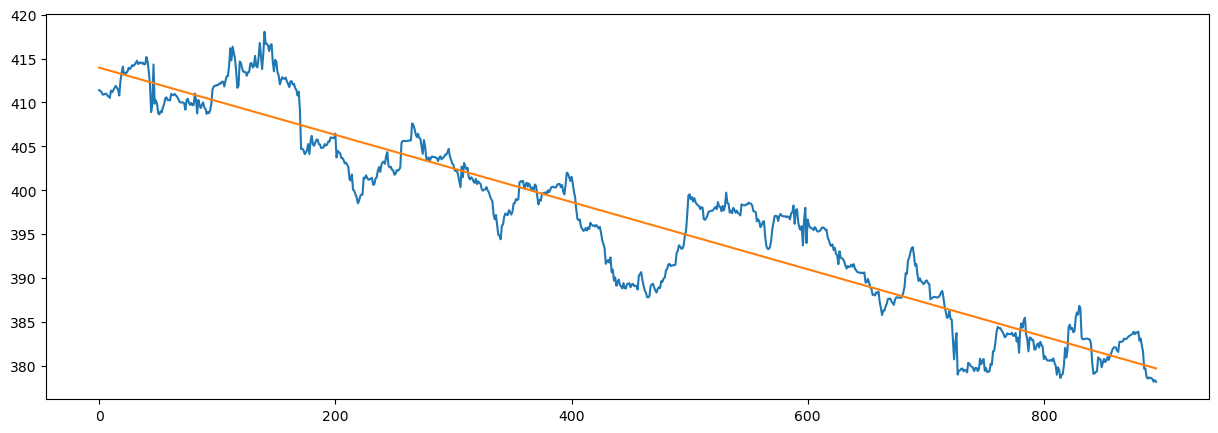

In [272]:
# Plot the predicted values compared with the historical data
plt.figure(figsize=(15,5))
plt.plot(data['close'])
plt.plot(data.index, predictions)

In [273]:
# Print the efficiency of the model
print('R^2:', reg.score(x, y))

R^2: 0.8872459463000972


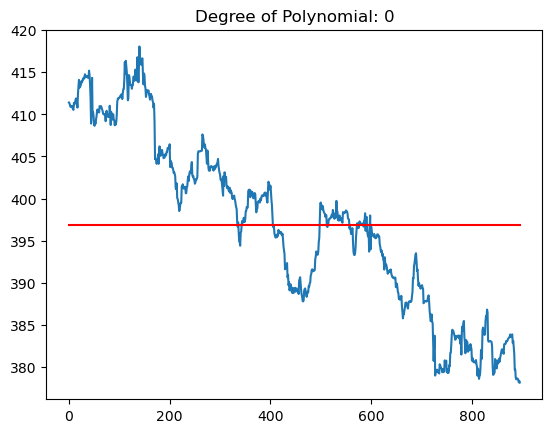

R^2: 0.0
Reg coefficient: [0.]
Reg Intercept: 396.83697265625


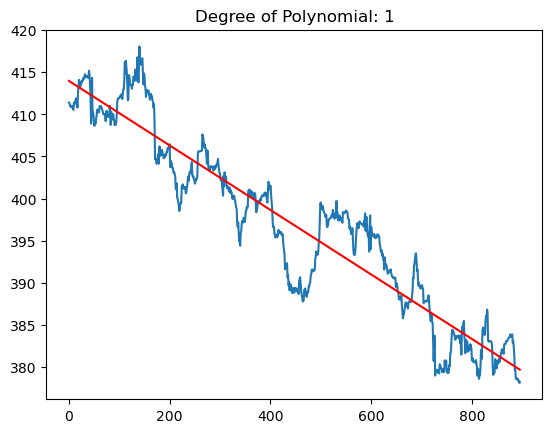

R^2: 0.8872459463000972
Reg coefficient: [ 0.         -0.03828455]
Reg Intercept: 413.9693088195772


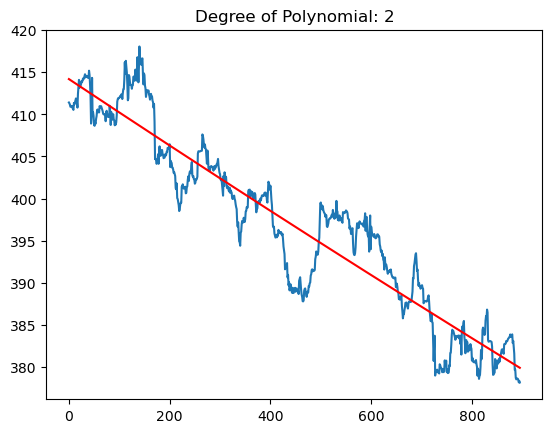

R^2: 0.8873320955076631
Reg coefficient: [ 0.00000000e+00 -3.97439991e-02  1.63066925e-06]
Reg Intercept: 414.18676671712336


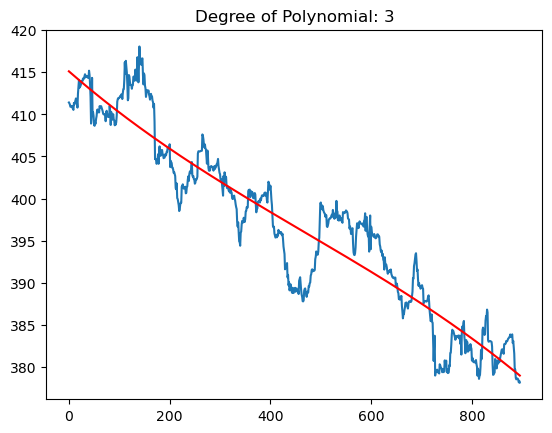

R^2: 0.8884401334036608
Reg coefficient: [ 0.00000000e+00 -5.21094382e-02  3.61902947e-05 -2.57427377e-08]
Reg Intercept: 415.1064467351068


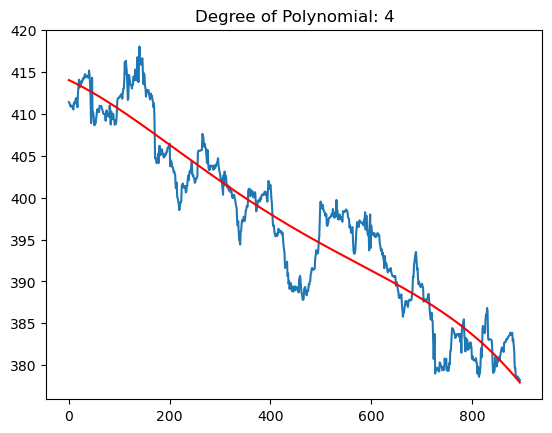

R^2: 0.8896065808093534
Reg coefficient: [ 0.00000000e+00 -2.81861652e-02 -8.42510759e-05  1.83668336e-07
 -1.16989425e-10]
Reg Intercept: 414.04126054855533


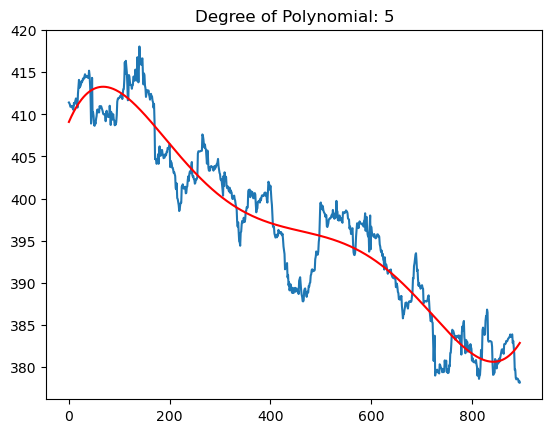

R^2: 0.910383897199393
Reg coefficient: [ 0.00000000e+00  1.38797478e-01 -1.39314766e-03  4.08677685e-06
 -5.02448119e-09  2.19327042e-12]
Reg Intercept: 409.09933141074583


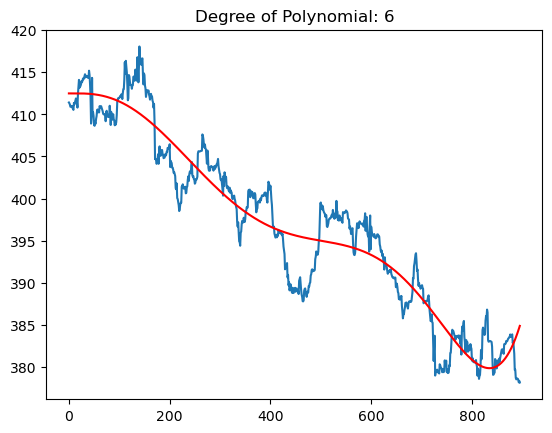

R^2: 0.9110462786654723
Reg coefficient: [ 0.00000000e+00  3.96480790e-07  4.13820474e-05 -2.00863252e-06
  7.30001443e-09 -9.60948217e-12  4.30709831e-15]
Reg Intercept: 412.4850572306406


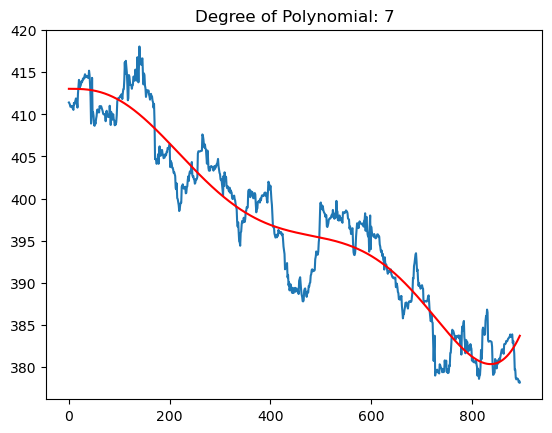

R^2: 0.9116290170332547
Reg coefficient: [ 0.00000000e+00  1.12901011e-09 -1.94427929e-08 -2.13552475e-06
  9.26261452e-09 -1.52506188e-11  1.06792329e-14 -2.54874253e-18]
Reg Intercept: 413.0313261853891


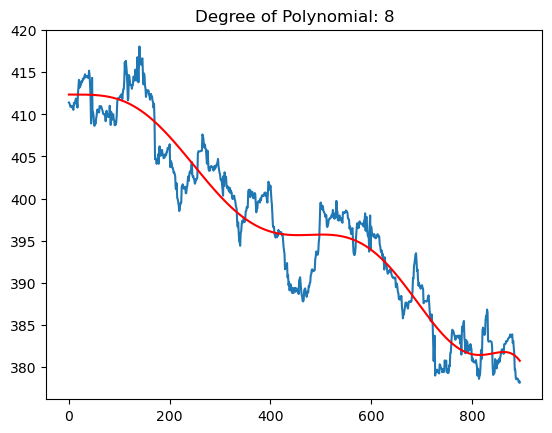

R^2: 0.9188192922533006
Reg coefficient: [ 0.00000000e+00  5.85088302e-11 -4.62129228e-13 -8.90319468e-11
 -1.04646224e-08  5.50095955e-11 -1.10042426e-13  9.78799124e-17
 -3.24841883e-20]
Reg Intercept: 412.34934537469456


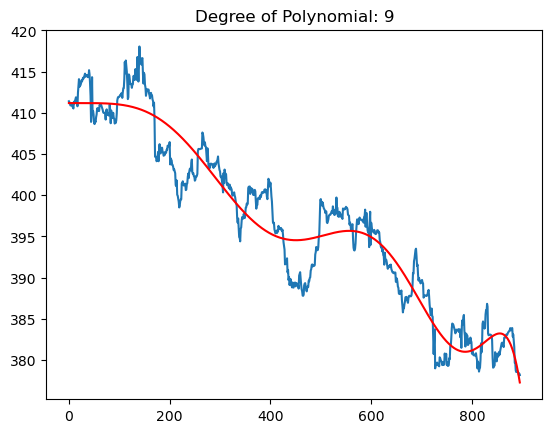

R^2: 0.9208123805343865
Reg coefficient: [ 0.00000000e+00  5.33298418e-13 -1.97792720e-17 -1.21942363e-15
 -2.49546134e-13 -3.10326863e-11  1.66970581e-13 -3.38601801e-16
  3.04552549e-19 -1.02199270e-22]
Reg Intercept: 411.1888299866027


In [274]:
m = range(10)

for i in m:
    poly_features = PolynomialFeatures(degree=i)
    x_poly = poly_features.fit_transform(x)
    reg = LinearRegression()
    reg.fit(x_poly, y)
    y_pred = reg.predict(x_poly)
    plt.plot(data.index, y)
    plt.plot(data.index, y_pred, color='red')
    plt.title(f'Degree of Polynomial: {i}')
    plt.show()
    print('R^2:', reg.score(x_poly, y))
    print('Reg coefficient:', reg.coef_)
    print('Reg Intercept:', reg.intercept_)